In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("data.csv",',', error_bad_lines=False)

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

In [4]:
data.head()

password  strength
0     kzde5577         1
1     kino3434         1
2    visi7k1yr         1
3     megzy123         1
4  lamborghin1         1

In [5]:
data[data['password'].isnull()]

password  strength
367579      NaN         0

In [6]:
data.dropna(inplace=True)

In [7]:
passwords_tuple = np.array(data)

In [8]:
passwords_tuple

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

In [9]:
# Shuffling the 2d array randomly
import random
random.shuffle(passwords_tuple) 

In [10]:
y = [labels[1] for labels in passwords_tuple]

In [11]:
y

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 0,
 1,
 2,
 1,
 2,
 1,
 1,
 0,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 2,
 2,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,


In [12]:
x = [labels[0] for labels in passwords_tuple]

In [13]:
import seaborn as sns

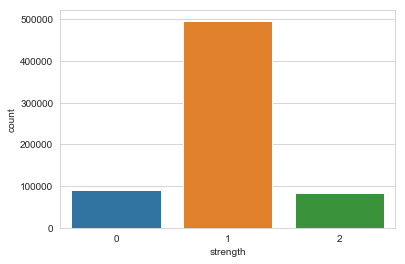

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='strength',data=data)

In [15]:
data['strength'].value_counts()

1    496801
0     89701
2     83137
Name: strength, dtype: int64

## NLP

In [16]:
def word_to_chars(word):
    characters = []
    for char in word:
        characters.append(char)
    return characters

In [17]:
## By default TfidfVectorizer uses words as tokenizer to create feature. In our case, each word is unique and thus will create
## more than 6 lakhs vectors which is very hard to train. Thus we will use a tokenizer which is a function which breaks the words
## into characters.

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer 
vectorizer = TfidfVectorizer(tokenizer=word_to_chars)

In [19]:
x_vect = vectorizer.fit_transform(x)

In [20]:
vectorizer.vocabulary_

{'k': 57,
 'z': 72,
 'd': 50,
 'e': 51,
 '5': 30,
 '7': 32,
 'i': 55,
 'n': 60,
 'o': 61,
 '3': 28,
 '4': 29,
 'v': 68,
 's': 65,
 '1': 26,
 'y': 71,
 'r': 64,
 'l': 58,
 'a': 47,
 'm': 59,
 'b': 48,
 'g': 53,
 'h': 54,
 'q': 63,
 'f': 52,
 't': 66,
 'u': 67,
 '6': 31,
 'c': 49,
 '8': 33,
 'w': 69,
 '9': 34,
 '0': 25,
 'p': 62,
 'j': 56,
 '2': 27,
 '-': 22,
 '@': 40,
 'x': 70,
 '!': 12,
 '.': 23,
 '&': 17,
 '?': 39,
 '>': 38,
 '<': 36,
 ';': 35,
 '_': 45,
 '±': 85,
 '%': 16,
 '$': 15,
 '/': 24,
 '(': 18,
 ')': 19,
 ' ': 11,
 '^': 44,
 '#': 14,
 'ú': 115,
 '*': 20,
 '+': 21,
 '{': 73,
 '}': 75,
 '=': 37,
 '[': 41,
 ']': 43,
 '\x1c': 8,
 '³': 87,
 '"': 13,
 '~': 76,
 '\\': 42,
 '`': 46,
 '\x16': 5,
 'ó': 110,
 'ò': 109,
 '·': 89,
 '\x1e': 10,
 '¿': 92,
 'þ': 119,
 'å': 98,
 '‚': 122,
 '«': 83,
 'ß': 93,
 'ä': 97,
 'à': 94,
 'ô': 111,
 '²': 86,
 '|': 74,
 'ð': 107,
 'â': 96,
 '\x10': 3,
 '\x17': 6,
 '\x19': 7,
 '¾': 91,
 '\x7f': 77,
 '\x08': 2,
 'ê': 103,
 'á': 95,
 'ÿ': 120,
 'õ': 112,
 

In [21]:
data.iloc[:,0]

0                          kzde5577
1                          kino3434
2                         visi7k1yr
3                          megzy123
4                       lamborghin1
5                  AVYq1lDE4MgAZfNt
6                          u6c8vhow
7                          v1118714
8                      universe2908
9                          as326159
10                         asv5o9yu
11                     612035180tok
12                       jytifok873
13                 WUt9IZzE0OQ7PkNE
14                     jerusalem393
15                       g067057895
16                      52558000aaa
17                         idofo673
18                        6975038lp
19                        sbl571017
20              elyass15@ajilent-ci
21                           intel1
22                 klara-tershina3H
23                       czuodhj972
24                      faranumar91
25                      cigicigi123
26                      0169395484a
27                        sc

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x_vect, y, test_size=0.20, random_state=42)  #splitting


In [25]:
log_class = LogisticRegression(penalty='l2',multi_class='ovr')
log_class.fit(X_train, y_train)
print(log_class.score(X_test,y_test))

C:\Users\Debayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Debayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

0.8126978675109013


C:\Users\Debayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [26]:
## Multinomial

clf = LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg')
clf.fit(X_train, y_train) #training
print(clf.score(X_test, y_test))

0.8199330983812197


In [27]:
X_predict=np.array(["jerusalem"])
X_predict=vectorizer.transform(X_predict)
y_pred=log_class.predict(X_predict)
print(y_pred)

[1]


###### XGBOOST

In [28]:
import xgboost as xgb

In [29]:
xgb_classifier = xgb.XGBClassifier()


In [30]:
xgb_classifier.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [31]:
xgb_classifier.score(X_test, y_test)

0.9145660354817514

In [32]:
X_predict=np.array(["password@12314%^&"])
X_predict=vectorizer.transform(X_predict)
y_pred=xgb_classifier.predict(X_predict)
print(y_pred)

[2]


In [33]:
import pickle

In [34]:
appfile = open("PassCheck_XGBoost.pkl","wb")
vectorfile = open("vectorizer.pkl","wb")
pickle.dump(xgb_classifier, appfile)
pickle.dump(vectorizer,vectorfile)
appfile.close()
vectorfile.close()

In [35]:
appfile = open("PassCheck_XGBoost.pkl","rb")
model = pickle.load(appfile)
X_predict=np.array(["password@12314%^&"])
X_predict=vectorizer.transform(X_predict)
y_pred=model.predict(X_predict)
print(y_pred)

[2]
